In [ ]:
#1  Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
import pandas as pd
df = pd.read_csv("/content/BIKE DETAILS (1).csv")
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [ ]:
#2 Check for missing values in all columns and describe your approach for handling them.
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS (1).csv')
df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


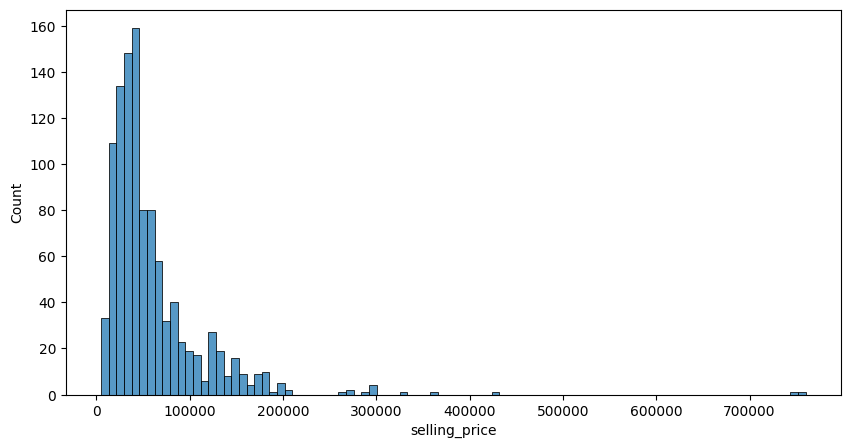

In [8]:
#3  Plot the distribution of selling prices using a histogram and describe the overall trend.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['selling_price'])
plt.show()




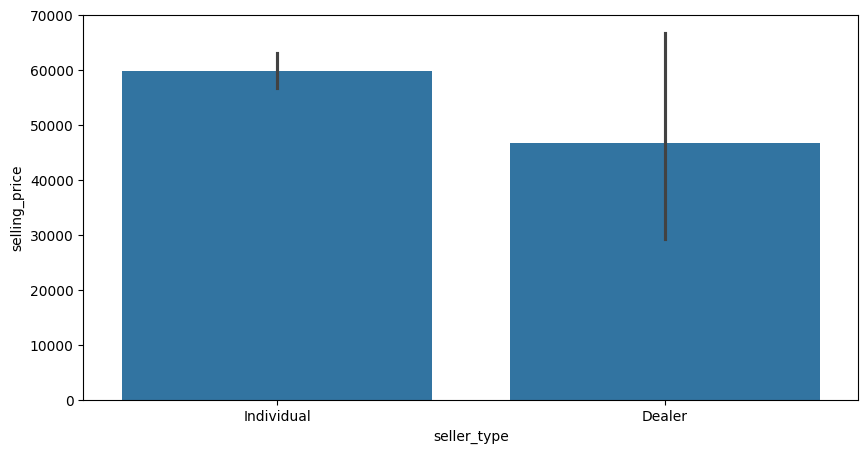

In [9]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
plt.figure(figsize=(10,5))
sns.barplot(x ='seller_type',y ='selling_price',data = df)
plt.show()

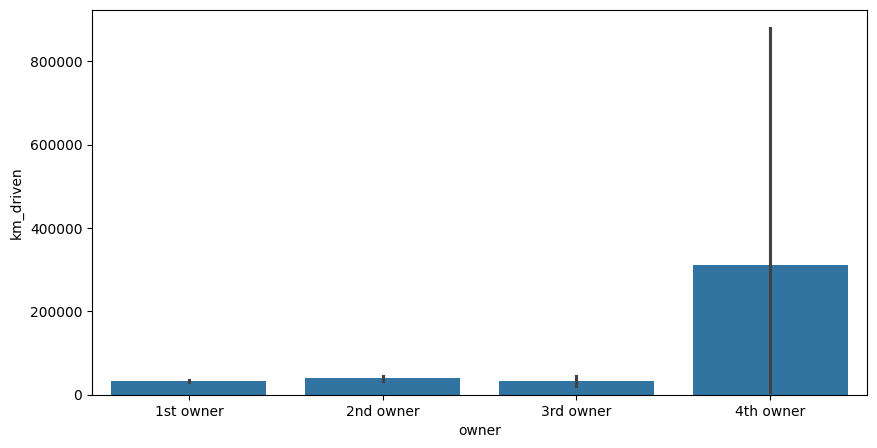

In [11]:
#5: Compute the average km_driven for each ownership type (1st owner,
# 2nd owner, etc.), and present the result as a bar plot.
plt.figure(figsize = (10,5))
sns.barplot(x ='owner',y ='km_driven',data = df)
plt.show()

In [13]:
#6: Use the IQR method to detect and remove outliers from the km_driven
# column. Show before-and-after summary statistics.

import pandas as pd

# Example: Load dataset
df = pd.read_csv("/content/BIKE DETAILS (1).csv")

# Show basic info
print("Before removing outliers:")
print(df['km_driven'].describe())

# Step 1: Calculate Q1 and Q3
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Detect outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print(f"\nNumber of outliers detected: {len(outliers)}")

# Step 5: Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 6: Compare summary statistics
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())




Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Number of outliers detected: 39

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


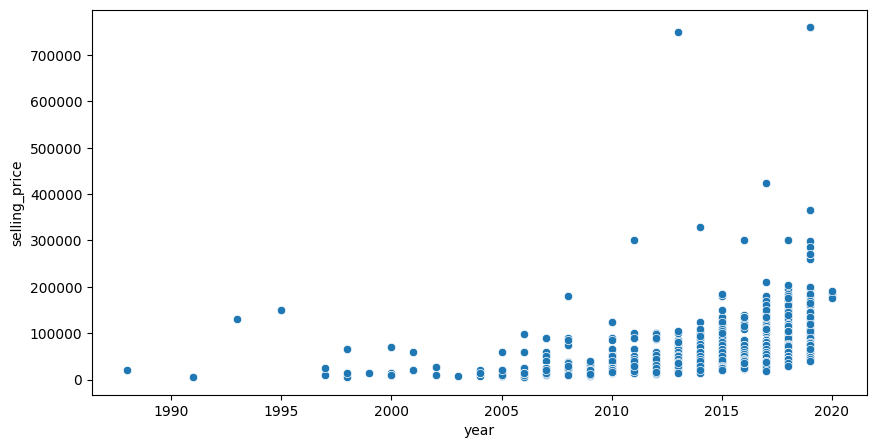

In [14]:
# 7: Create a scatter plot of year vs. selling_price to explore the
# relationship between a bike's age and its price.

plt.figure(figsize=(10,5))
sns.scatterplot(x='year',y ='selling_price',data = df)
plt.show()

In [15]:
#8: Convert the seller_type column into numeric format using one-hot
# encoding. Display the first 5 rows of the resulting DataFrame.


# Show original column
print("Original 'seller_type' column:")
print(df['seller_type'].head())

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print("\nDataFrame after one-hot encoding:")
print(df_encoded.head())

Original 'seller_type' column:
0    Individual
1    Individual
2    Individual
3    Individual
4    Individual
Name: seller_type, dtype: object

DataFrame after one-hot encoding:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False             

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


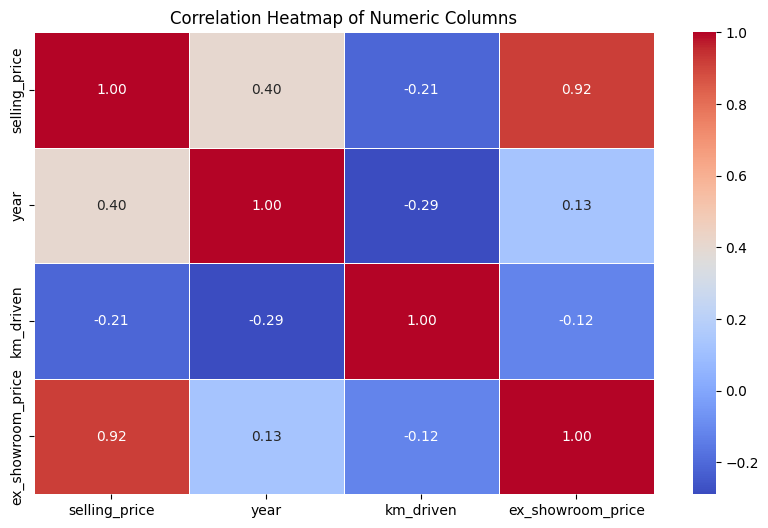

In [16]:
#9: Generate a heatmap of the correlation matrix for all numeric columns.
# What correlations stand out the most?

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display matrix
print(corr_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


10● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.

ans-> The most important factors affecting a bike's selling price are

1. km driven
2. engine capacity
3. Year of Manufacture
4. Brand & Fuel Type (if available)
5. Owner Type / Seller Type

-> the data cleaning performed is following :
   * Missing Values
   *Outlier Treatment
   *Data Type Fixing

-> the feature engineering performed is : one-hot encoding.